# Basic K-Means Clustering on 2D Array

This notebook demonstrates a simple K-Means clustering example on a 2D dataset.

## Code Explanation

The code below performs the following steps:

### 1. Data Generation
- **`make_blobs()`**: Creates synthetic data with known cluster structure
  - `n_samples=1500`: Generates 1,500 data points
  - `centers=4`: Creates 4 true underlying clusters
  - `cluster_std=1.2`: Sets the standard deviation (spread) of each cluster
  - `random_state=42`: Ensures reproducible results
- Returns **X** (feature matrix with shape [1500, 2]) and **y_true** (true cluster labels for reference)

### 2. K-Means Clustering
- **`KMeans()`**: Initializes the K-Means algorithm from scikit-learn
  - `n_clusters=4`: Specifies we want to find 4 clusters
  - `init='k-means++'`: Uses smart initialization (chooses initial centroids that are far apart)
  - `n_init=10`: Runs the algorithm 10 times with different initializations and picks the best result
  - `random_state=42`: Ensures reproducibility
- **`.fit(X)`**: Trains the model on the data

### 3. Extract Results
- **`labels`**: Cluster assignment for each data point (0, 1, 2, or 3)
- **`centers`**: Coordinates of the 4 cluster centroids (the "means" in K-Means)

### 4. Visualization
- **Scatter plot**: Shows all data points colored by their assigned cluster
- **Red X markers**: Displays the final centroid positions
- **Result**: Visual confirmation that K-Means successfully identified the 4 clusters

This is the most basic K-Means workflow: generate/load data → apply clustering → visualize results.

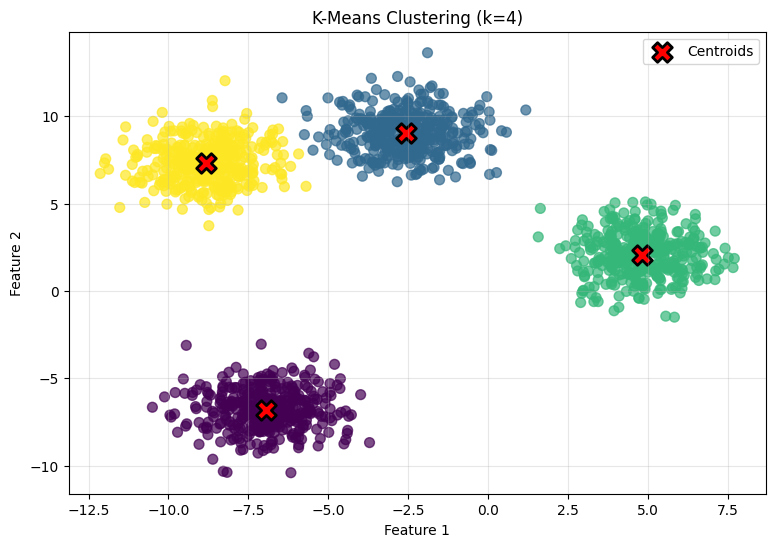

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 1. Generate synthetic data (4 clusters)
X, y_true = make_blobs(n_samples=1500, centers=4, cluster_std=1.2,
                       random_state=42)

# 2. Apply K-Means (we pretend we don't know the true number of clusters)
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X)

# 3. Results
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# 4. Visualize
plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X',
            edgecolor='black', linewidth=2, label='Centroids')
plt.title("K-Means Clustering (k=4)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Elbow Method: Finding Optimal K

The **Elbow Method** helps determine the optimal number of clusters when you don't know it beforehand.

## Problem
How do we choose K? If we pick too few clusters, we lose detail. Too many, and we overfit.

## Solution: Try Multiple K Values and Plot Inertia

### Code Explanation

#### 1. Setup
- **`inertias = []`**: Empty list to store the "inertia" (total within-cluster sum of squares) for each K
- **`K_range = range(1, 11)`**: Tests K from 1 to 10 clusters

#### 2. Loop Through K Values
For each value of K (1, 2, 3, ..., 10):
- **Create a new K-Means model** with that number of clusters
- **Fit the model** to the data (X from the previous example)
- **Extract `inertia_`**: This measures how tightly points are grouped around their centroids
  - Lower inertia = tighter, better-defined clusters
  - Formula: Sum of squared distances from each point to its assigned centroid
- **Store the inertia** in the list

#### 3. Plot the Elbow Curve
- **X-axis**: Number of clusters (K)
- **Y-axis**: Inertia (WCSS - Within-Cluster Sum of Squares)
- **Pattern**: As K increases, inertia always decreases (more clusters = better fit)
- **The "Elbow"**: Look for the point where the curve bends sharply
  - Before the elbow: Adding clusters significantly reduces inertia
  - After the elbow: Diminishing returns—adding more clusters doesn't help much

#### 4. Identify Optimal K
- **Red dashed line at K=4**: Marks a possible elbow point
- This is where we get the best balance between:
  - **Simplicity** (fewer clusters)
  - **Fit quality** (low inertia)

## Interpretation
The "elbow" at K=4 suggests this is the optimal number of clusters for this dataset. Beyond K=4, the improvement in inertia becomes marginal.

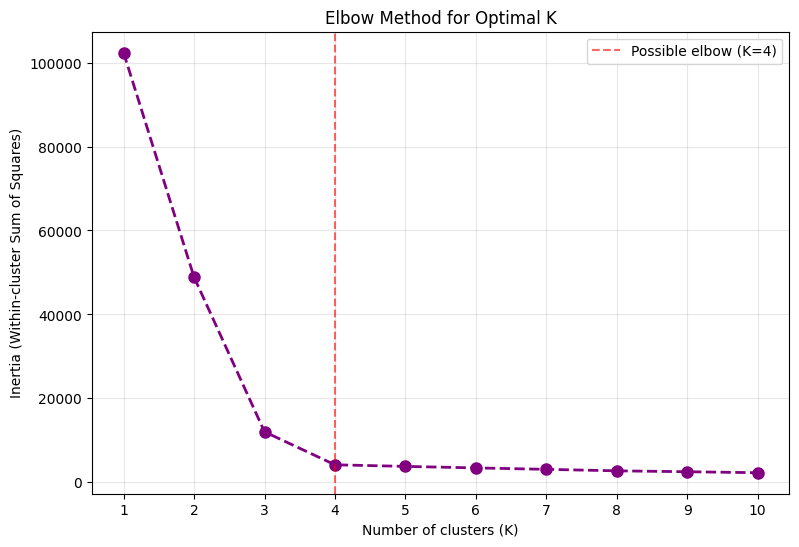

In [4]:

inertias = []
K_range = range(1, 11)   # usually try 1 to ~10–15 

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(9, 6))
plt.plot(K_range, inertias, 'o--', color='purple', linewidth=2, markersize=8)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.xticks(K_range)
plt.grid(True, alpha=0.3)

# Optional: mark a possible elbow (example)
plt.axvline(x=4, color='red', linestyle='--', alpha=0.6, label='Possible elbow (K=4)')
plt.legend()
plt.show()